## Salinity at M8 (top and bottom) - 31m & 55m

In [5]:
%matplotlib inline

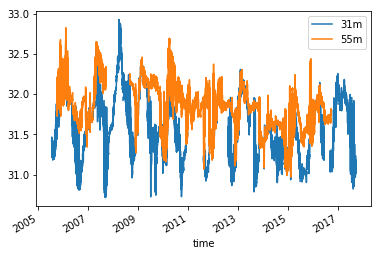

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

df =pd.read_excel('/Users/bell/in_and_outbox/2018/stabeno/mar/m8_salinities/ALL_topandbottom.xlsx',sheet_name='Hourly',usecols=[0,2,3,4],dateparse=True)
df.set_index(pd.DatetimeIndex(df['time']),inplace=True,drop=True)

df2 = df[['31m','55m']].copy()
df2.plot()


In [7]:
#monthly climatology
climatology = df2.groupby(df2.index.month).mean()

#monthly mean
monthly_mean = df2.resample('1M').mean()

***Export to csv and use excel to calculate anomalies***

In [9]:
df3 =pd.read_excel('/Users/bell/in_and_outbox/2018/stabeno/mar/m8_salinities/ALL_topandbottom.xlsx',
                   sheet_name='Monthly',dateparse=True,na_values=[' '])
df3.set_index(pd.DatetimeIndex(df3['time']),inplace=True,drop=True)

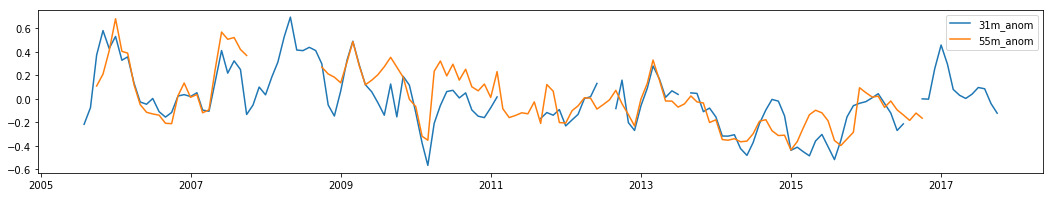

In [10]:
plt.figure(1, figsize=(18, 3), facecolor='w', edgecolor='w')
plt.subplot(1,1,1)
plt.plot(df3.index,df3['31m_anom'])
plt.plot(df3.index,df3['55m_anom'])
plt.legend()

In [11]:
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import matplotlib.ticker as ticker
import matplotlib as mpl

mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['xtick.minor.size'] = 4
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.weight'] = 'light'
mpl.rcParams['svg.fonttype'] = 'none'

(731947.0, 736695.0)

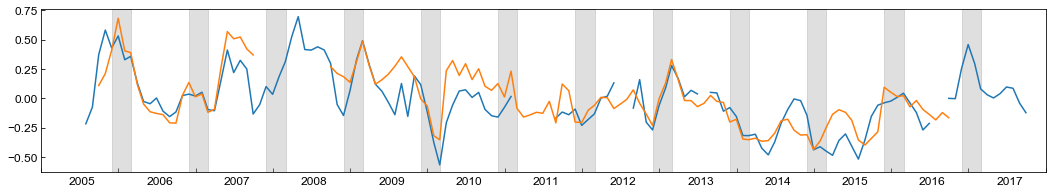

In [12]:
plt.figure(1, figsize=(18, 3), facecolor='w', edgecolor='w')
plt.subplot(1,1,1)
plt.plot(df3.index,df3['31m_anom'])
plt.plot(df3.index,df3['55m_anom'])
ax1=plt.gca()
ax1.xaxis.set_major_locator(YearLocator(day=15,month=7))
ax1.xaxis.set_minor_locator(YearLocator(day=1,month=1))
ax1.xaxis.set_minor_formatter(ticker.NullFormatter())
ax1.xaxis.set_major_formatter(DateFormatter('%Y'))
#plt.legend()

#highlight DJF
for baryear in range(2005,2017,1):
    ax1.axvspan(datetime.datetime(baryear,12,1), datetime.datetime(baryear+1,3,1), alpha=0.25, color='grey')

ax1.set_xlim([datetime.datetime(2005,1,1),datetime.datetime(2018,1,1)])

#final plot spruced up in Illustrator

### Follow up with M4 Bottom Salinity Analysis